# IMDB EDA (CORE)

**Marco Jimenez**

In [40]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Reading in the 2000 and 2001 dataframes
df_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
df_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")
# Concatenating the two dataframes
df = pd.concat([df_2000, df_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1884.0,PG


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 1280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2479 non-null   object 
 1   adult                  2477 non-null   float64
 2   backdrop_path          1257 non-null   object 
 3   belongs_to_collection  194 non-null    object 
 4   budget                 2477 non-null   float64
 5   genres                 2477 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2477 non-null   float64
 8   original_language      2477 non-null   object 
 9   original_title         2477 non-null   object 
 10  overview               2424 non-null   object 
 11  popularity             2477 non-null   float64
 12  poster_path            2173 non-null   object 
 13  production_companies   2477 non-null   object 
 14  production_countries   2477 non-null   object 
 15  rele

In [43]:
# Getting movies that had at least some valid financial information
budget_df = df.loc[df['budget'] > 0]
revenue_df = df.loc[df['revenue'] > 0]
# Concatenating the dataframes and displaying the shape to count the number of movies with valid financial data
financial_df = pd.concat([budget_df, revenue_df])

In [44]:
print(f"Movies with a budget over 0: {len(budget_df['budget'])}")
print(f"Movies with revenue over 0: {len(revenue_df['revenue'])}")
print("\n")
print(f"Total number of movies with valid financial information: {len(financial_df)} ")

Movies with a budget over 0: 536
Movies with revenue over 0: 426


Total number of movies with valid financial information: 962 


In [45]:
cert_order = ['G','PG','PG-13','R']

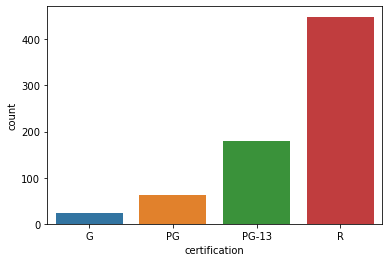

In [46]:
sns.countplot(data=df, x='certification', order=cert_order);

In [47]:
plot_df = df[df['certification'].isin(cert_order)]
plot_df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,715.0,7.150000e+02,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000
mean,0.0,1.732071e+07,55947.993007,10.889081,3.653515e+07,100.861538,0.001399,5.536364,785.260140
std,0.0,2.818899e+07,96965.097064,18.438687,9.227001e+07,19.177020,0.037398,1.641562,2109.611603
min,0.0,0.000000e+00,16.000000,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000e+00,10218.500000,2.875500,0.000000e+00,90.000000,0.000000,5.000000,11.500000
50%,0.0,7.000000e+05,19419.000000,6.975000,0.000000e+00,97.000000,0.000000,5.900000,94.000000
75%,0.0,2.500000e+07,53274.500000,11.602500,2.784699e+07,108.000000,0.000000,6.550000,504.000000
max,0.0,1.400000e+08,795374.000000,256.622000,9.764756e+08,224.000000,1.000000,10.000000,22677.000000


In [48]:
# Filtering each of the specified film ratings
g_df = df[df['certification'] == 'G']
pg_df = df[df['certification'] == 'PG']
pg13_df = df[df['certification'] == 'PG-13']
r_df = df[df['certification'] == 'R']

In [49]:
# Printing the average revenue and budget for each film rating
print(f"Average revenue for films with a G rating: {g_df['revenue'].mean().round(2)}")
print(f"Average budget for films with a G rating: {g_df['budget'].mean().round(2)}")
print("\n")
print(f"Average revenue for films with a PG rating: {pg_df['revenue'].mean().round(2)}")
print(f"Average budget for films with a PG rating: {pg_df['budget'].mean().round(2)}")
print("\n")
print(f"Average revenue for films with a PG-13 rating: {pg13_df['revenue'].mean().round(2)}")
print(f"Average budget for films with a PG-13 rating: {pg13_df['budget'].mean().round(2)}")
print("\n")
print(f"Average revenue for films with a R rating: {r_df['revenue'].mean().round(2)}")
print(f"Average budget for films with a R rating: {r_df['budget'].mean().round(2)}")

Average revenue for films with a G rating: 72163319.33
Average budget for films with a G rating: 23833333.33


Average revenue for films with a PG rating: 63416525.44
Average budget for films with a PG rating: 25391129.18


Average revenue for films with a PG-13 rating: 71918401.54
Average budget for films with a PG-13 rating: 31405044.04


Average revenue for films with a R rating: 16734023.5
Average budget for films with a R rating: 10211910.79
